In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
def calc_derivative(df, diff=1):
    dt = pd.Series(df.index).diff(periods=diff)
    dXdt = df.reset_index().diff(periods=diff).div(dt, axis=0)
    dXdt = dXdt.add_suffix('_derivative_1')
    return dXdt.set_index(df.index)

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

# Metainformationen
df1: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 15 MPa, Druckhaltezeit 10s

df2: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 19 MPa, Druckhaltezeit 10s

df3: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 23 MPa, Druckhaltezeit 10s

In [3]:
df1 = pd.read_excel('WS950_WZ90_p15_t10.xlsx', sheet_name='Sheet1', index_col='Timestamp').drop_duplicates()

In [4]:
df1.head()

,Stempel_innen_mitte,Stempel_aussen,Matrize_oben_zarge,Matrize_mitte_zarge,Matrize_unten_zarge,Werkstueck_boden,Werkstueck_flansch,Werkstueck_zarge_mitte,Werkstück_zarge_unten,Werkstueck_zarge_oben
Timestamp,,,,,,,,,,
0.0,90.0,90.0,90.0,90.0,90.0,20.0000,20.0000,20.0000,20.0000,20.0000
6.0,90.0,90.0,90.0,90.0,90.0,39.0195,39.0195,39.0195,39.0195,39.0195
12.0,90.0,90.0,90.0,90.0,90.0,57.6302,57.6302,57.6302,57.6302,57.6302
18.0,90.0,90.0,90.0,90.0,90.0,75.8570,75.8570,75.8570,75.8570,75.8570
24.0,90.0,90.0,90.0,90.0,90.0,93.7225,93.7225,93.7225,93.7225,93.7225


In [5]:
dX1dt = calc_derivative(df1, diff=15).drop(columns='Timestamp_derivative_1')

In [6]:
dX1dt.head()

,Stempel_innen_mitte_derivative_1,Stempel_aussen_derivative_1,Matrize_oben_zarge_derivative_1,Matrize_mitte_zarge_derivative_1,Matrize_unten_zarge_derivative_1,Werkstueck_boden_derivative_1,Werkstueck_flansch_derivative_1,Werkstueck_zarge_mitte_derivative_1,Werkstück_zarge_unten_derivative_1,Werkstueck_zarge_oben_derivative_1
Timestamp,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(90.0, 160.0)

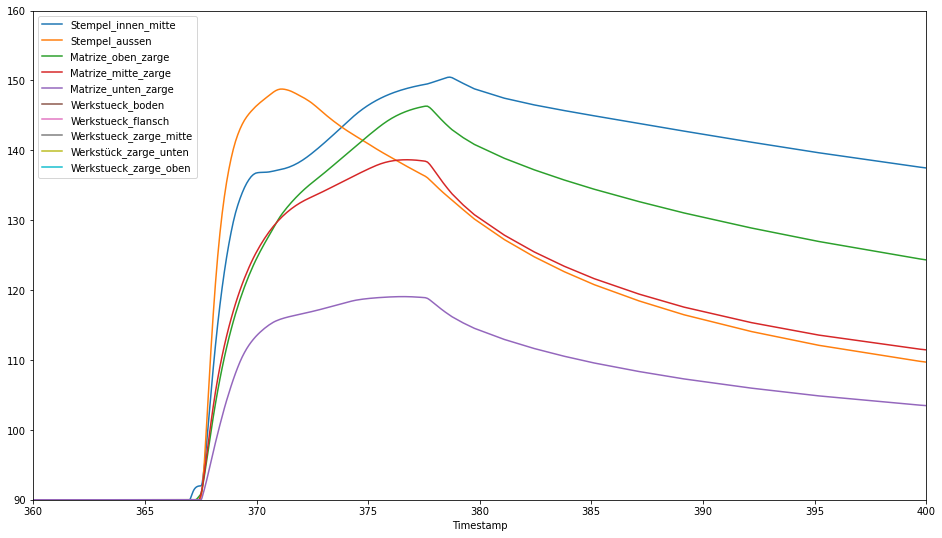

In [7]:
df1.plot(figsize=(16,9))
plt.xlim(360,400)
plt.ylim(90,160)

In [8]:
plot_vars = ['Stempel_innen_mitte', 'Matrize_mitte_zarge', 'Werkstueck_boden', 'Werkstueck_zarge_mitte']
plot_vars_der = [x+'_derivative_1' for x in plot_vars]
start_time = 367

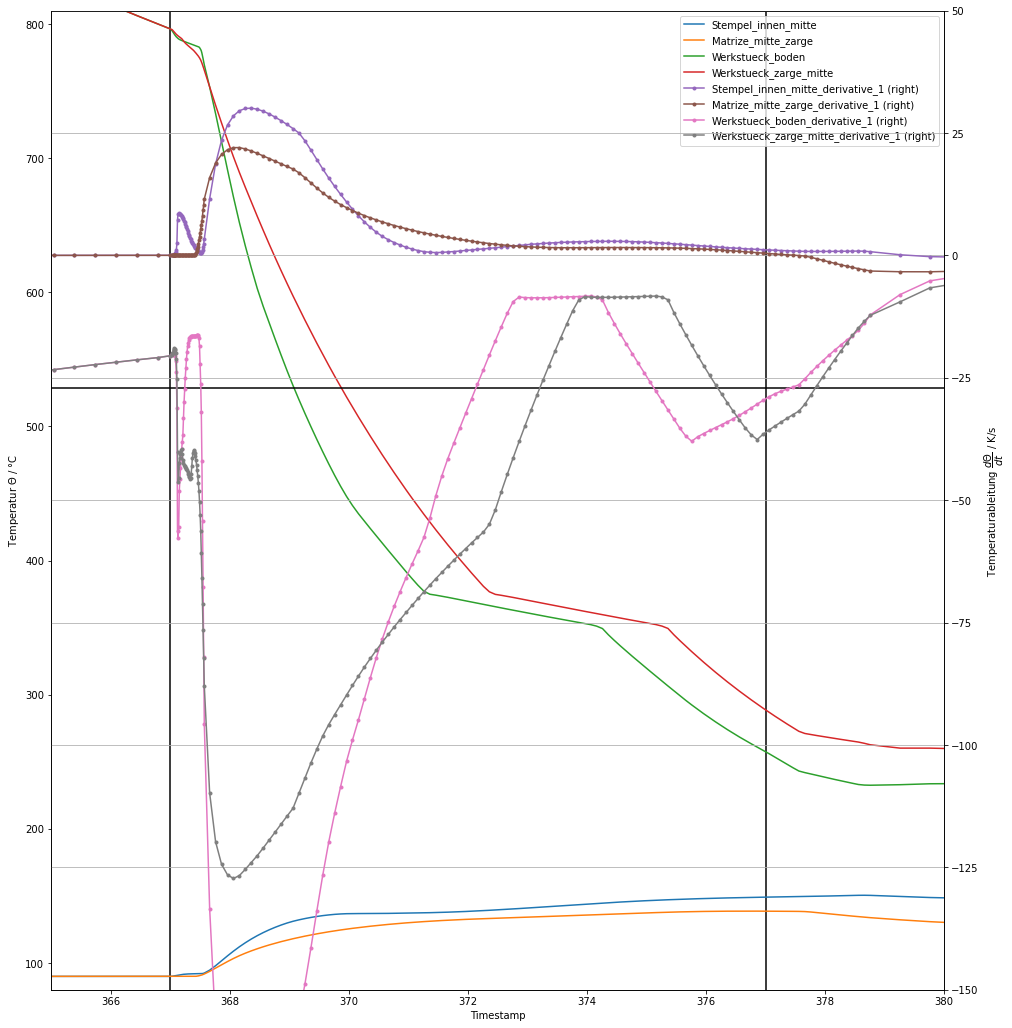

In [9]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df1[plot_vars].plot(ax=ax1)

dX1dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_1.png')

In [10]:
df2 = pd.read_excel('WS950_WZ90_p19_t10.xlsx', sheet_name='Sheet1', index_col='Timestamp').drop_duplicates()
dX2dt = calc_derivative(df2, diff=15).drop(columns='Timestamp_derivative_1')


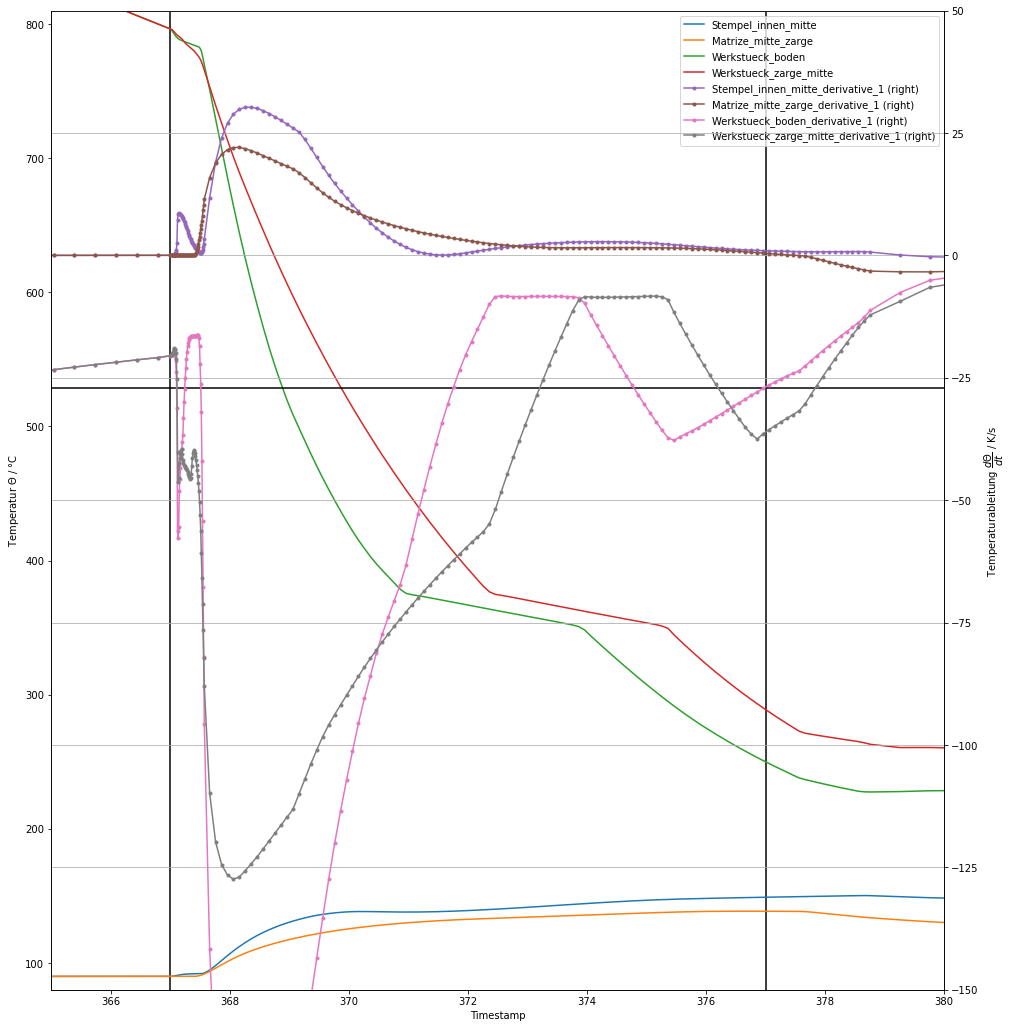

In [11]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df2[plot_vars].plot(ax=ax1)

dX2dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_2.png')

In [12]:
df3 = pd.read_excel('WS950_WZ90_p23_t10.xlsx', sheet_name='Sheet1', index_col='Timestamp').drop_duplicates()
dX3dt = calc_derivative(df3, diff=15).drop(columns='Timestamp_derivative_1')


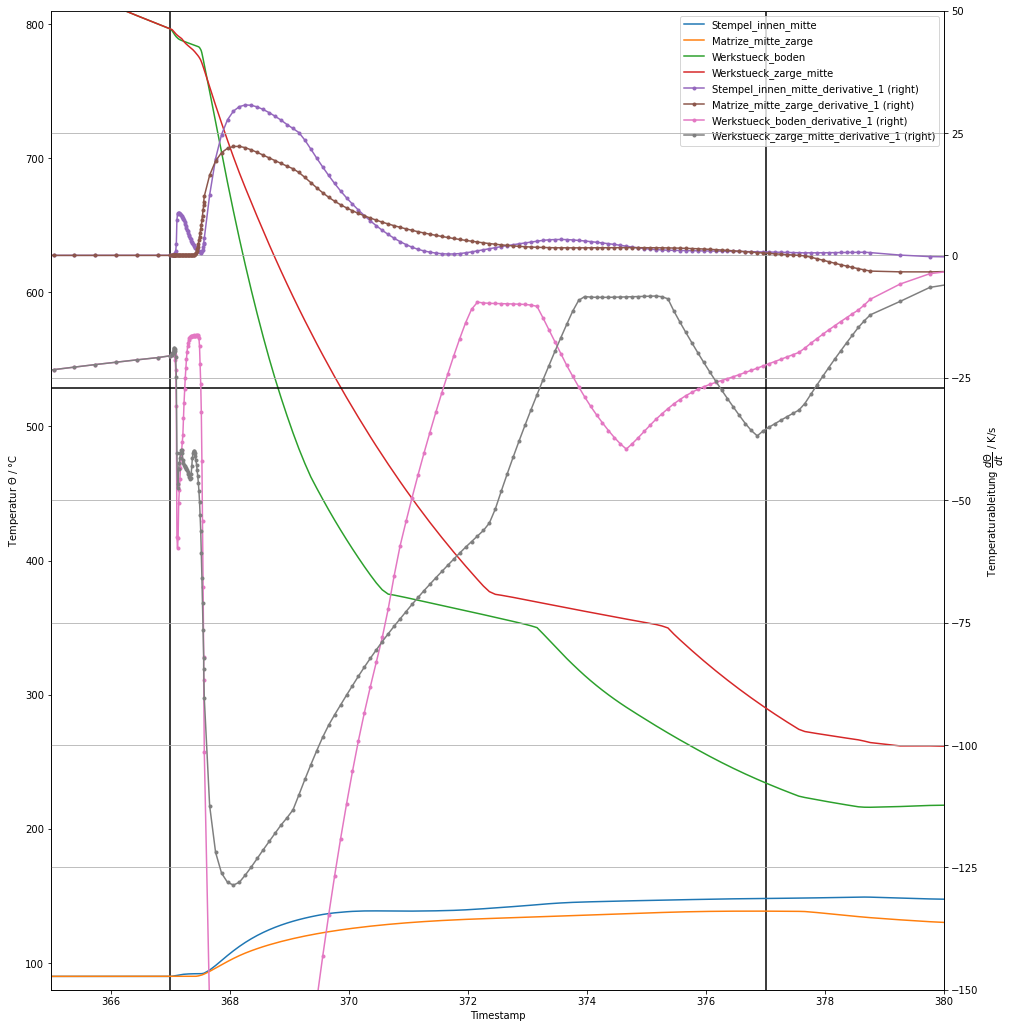

In [13]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df3[plot_vars].plot(ax=ax1)

dX3dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_3.png')

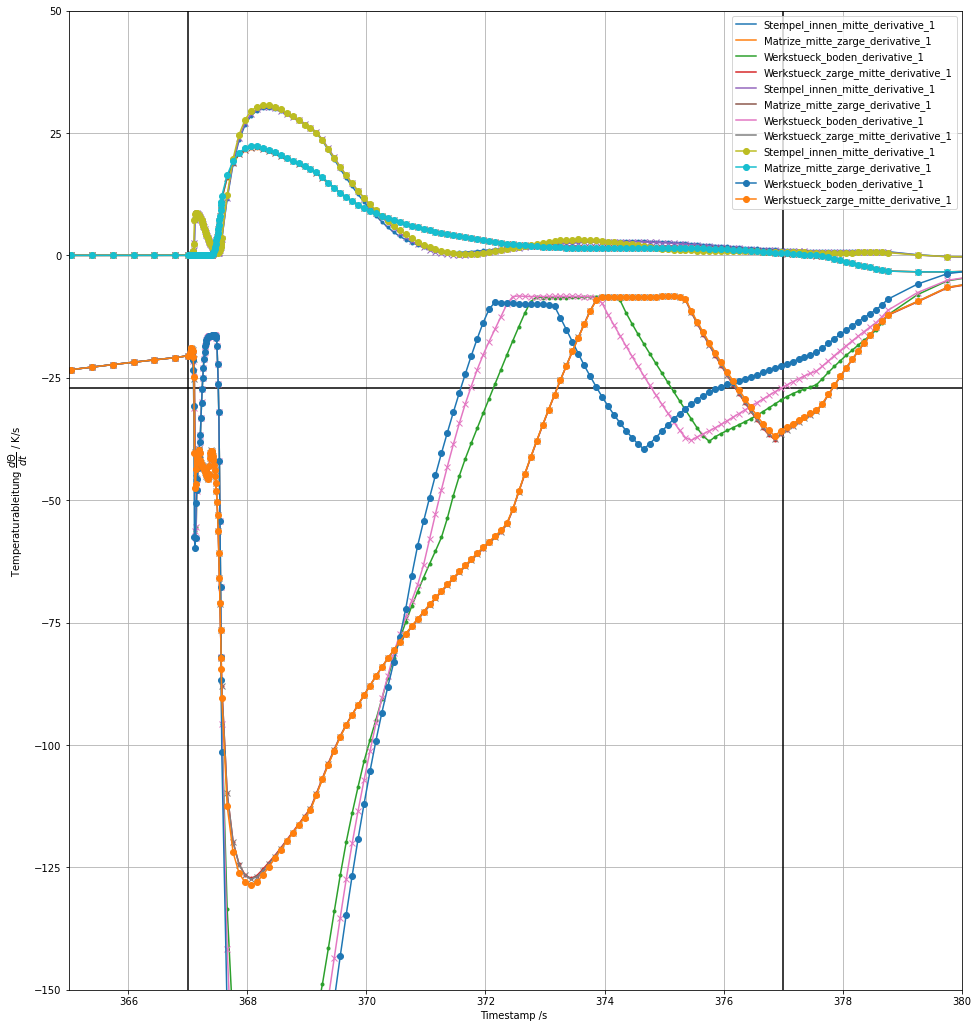

In [14]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(-150, 50)

dX1dt[plot_vars_der].plot(ax=ax1, style='.-')
dX2dt[plot_vars_der].plot(ax=ax1, style='x-')
dX3dt[plot_vars_der].plot(ax=ax1, legend=True, style='o-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
ax1.set_xlabel('Timestamp /s ')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_derivatives_123.png')

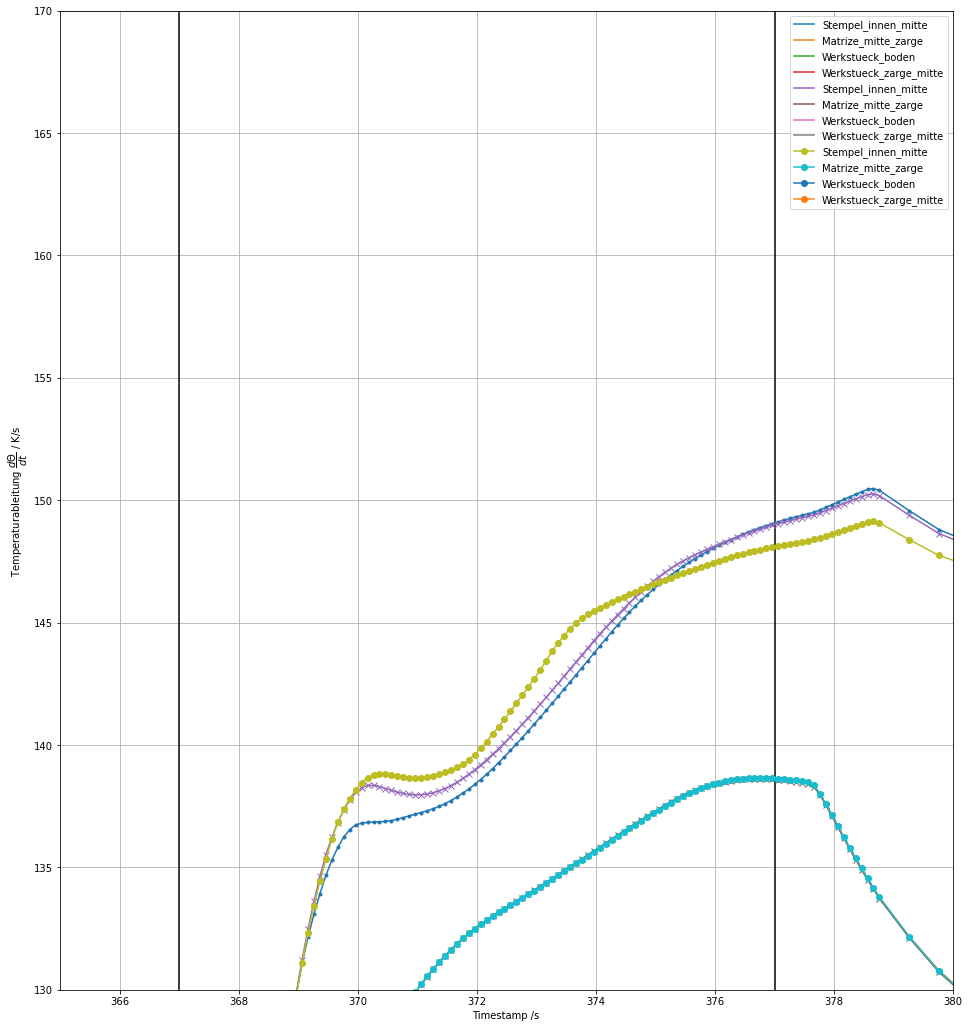

In [15]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')

df1[plot_vars].plot(ax=ax1, style='.-')
df2[plot_vars].plot(ax=ax1, style='x-')
df3[plot_vars].plot(ax=ax1, legend=True, style='o-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(130,170)
ax1.set_ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
ax1.set_xlabel('Timestamp /s ')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_123.png')

### df1 und df3 für training nutzen df2 für testen
Vorher: Ableitungen rechts anhängen

In [16]:
df1_wd = df1.join(dX1dt)
df2_wd = df2.join(dX2dt)
df3_wd = df3.join(dX3dt)

In [17]:
train = df1_wd.reset_index().append(df3_wd.reset_index()).dropna()
test = df2_wd.reset_index().dropna()

In [18]:
train.keys()

Index(['Timestamp', 'Stempel_innen_mitte', 'Stempel_aussen',
       'Matrize_oben_zarge', 'Matrize_mitte_zarge', 'Matrize_unten_zarge',
       'Werkstueck_boden', 'Werkstueck_flansch', 'Werkstueck_zarge_mitte',
       'Werkstück_zarge_unten', 'Werkstueck_zarge_oben',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
       'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_flansch_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstück_zarge_unten_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [19]:

Werkstueck_labels = ['Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1','Timestamp']
no_derivatives_labels = ['Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
                        'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
                        'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
targets= ['Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben']
 

In [20]:
X_train = train.drop(labels=Werkstueck_labels , axis=1)
y_train = train[targets]
X_test = test.drop(labels=Werkstueck_labels, axis=1)
y_test = test[targets]

### Simple linear model as baseline

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:104.57812005423273, R2:0.8215426284613343
test set RMSE:105.22181480887836, R2:0.8195158605677616


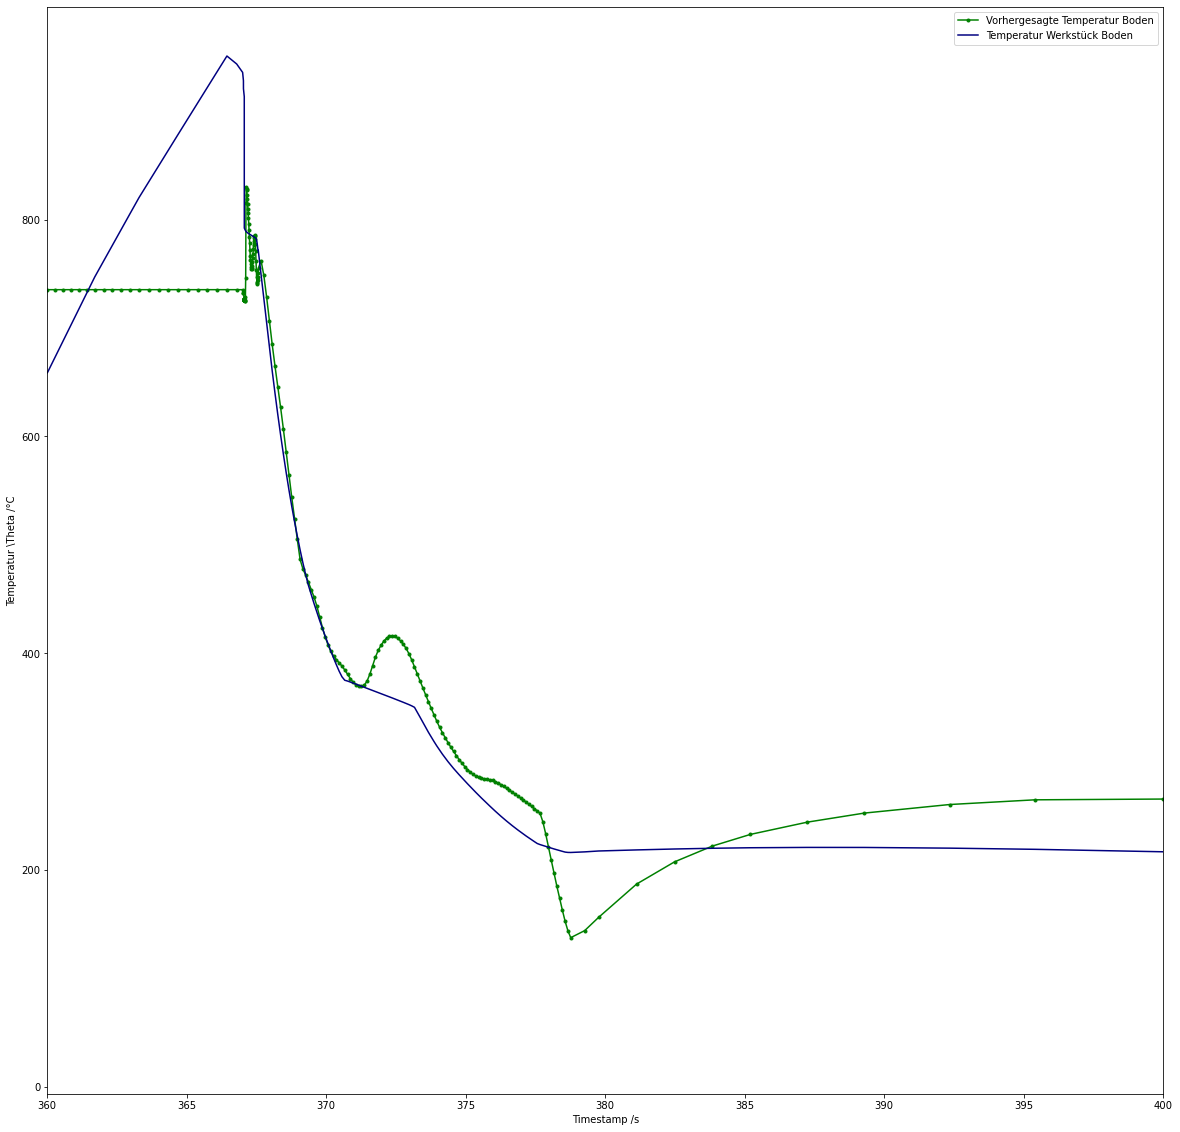

In [23]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp[6:], df3['Werkstueck_boden'][5:],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()
plt.savefig('plots/linear_model.png')

### Try RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
y_hat_train = rf.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:96.39865341834665, R2:0.848387105021412
test set RMSE:97.09880331034654, R2:0.8463757564185066


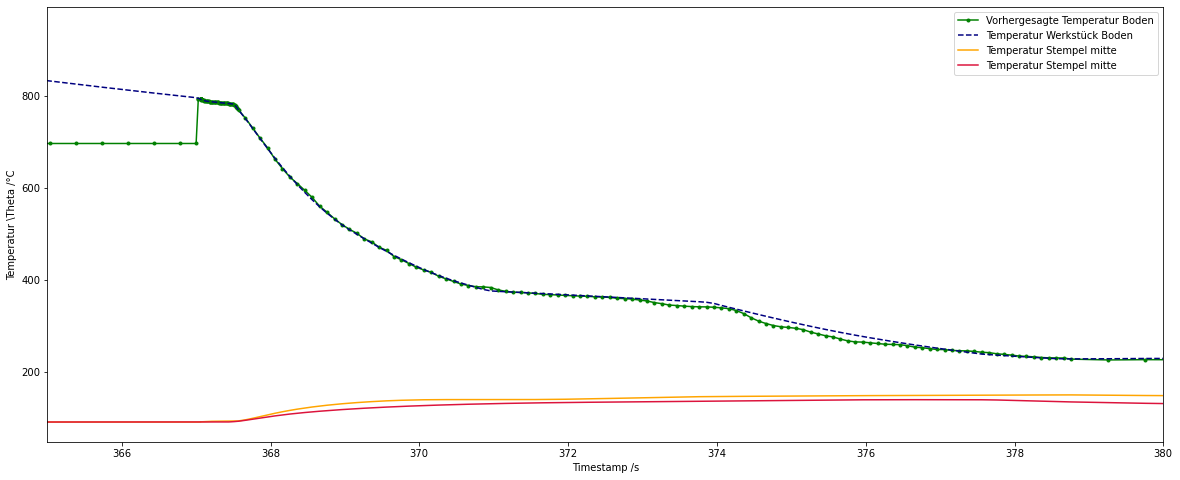

In [26]:
plt.figure(figsize=(20,8))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp, y_test['Werkstueck_boden'], '--',label='Temperatur Werkstück Boden', color='navy')
plt.plot(test.Timestamp[5:], df3['Stempel_innen_mitte'],label='Temperatur Stempel mitte', color='orange')
plt.plot(test.Timestamp[5:], df3['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(365, 380)
plt.legend()
plt.savefig('plots/random_forest_model.png')

In [27]:
from sklearn.multioutput import MultiOutputRegressor
gb = MultiOutputRegressor(GradientBoostingRegressor())
gb.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [28]:
y_hat_train = gb.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = gb.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:96.37158668316754, R2:0.8484739620648251
test set RMSE:97.13167494672784, R2:0.8462955700418184


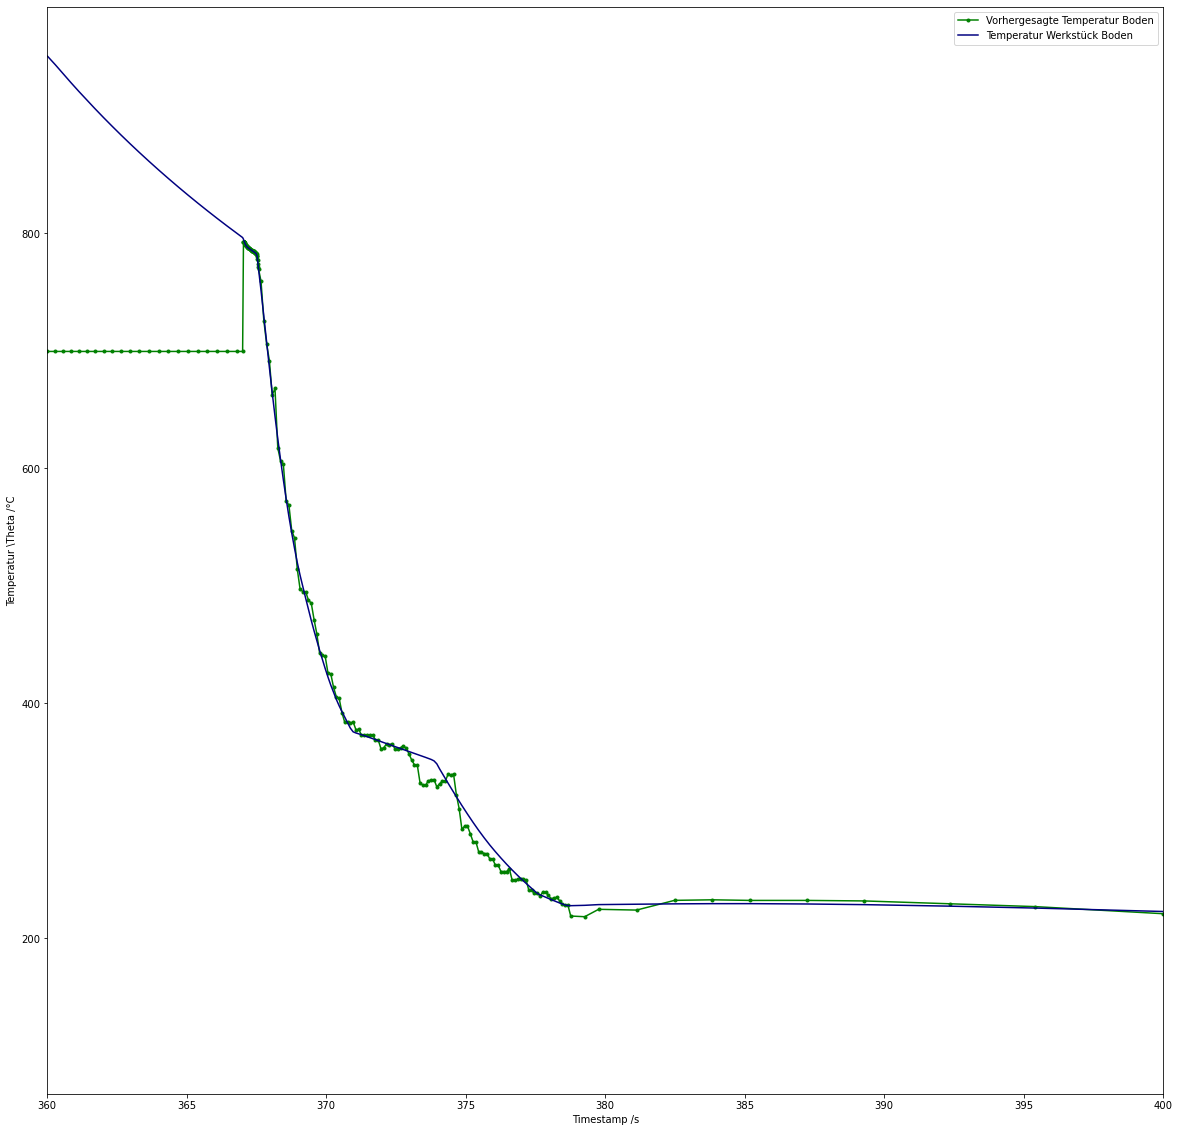

In [29]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()

plt.savefig('plots/gradient_boosting_model.png')

### Even better with MLP?

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, InputLayer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [31]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = X_train.copy()
X_train_scaled = pd.DataFrame(scaler.transform(X_train))


X_test_scaled = X_test.copy()
X_test_scaled= pd.DataFrame(scaler.transform(X_test))


In [32]:
input_dim = len(X_train.keys())
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_dim))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 3,397
Trainable params: 3,397
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/300
19/19 [==============================] - 1s 8ms/step - loss: 354810.6250 - val_loss: 333426.9062
Epoch 2/300
19/19 [==============================] - 0s 2ms/step - loss: 318368.5000 - val_loss: 288510.5625
Epoch 3/300
19/19 [==============================] - 0s 2ms/step - loss: 259260.2344 - val_loss: 215745.5625
Epoch 4/300
19/19 [==============================] - 0s 2ms/step - loss: 183013.7656 - val_loss: 148422.6719
Epoch 5/300
19/19 [==============================] - 0s 2ms/step - loss: 135659.2812 - val_loss: 121915.0469
Epoch 6/300
19/19 [==============================] - 0s 2ms/step - loss: 114492.5938 - val_loss: 109453.5469
Epoch 7/300
19/19 [==============================] - 0s 2ms/step - loss: 109251.1953 - val_loss: 108274.7812
Epoch 8/300
19/19 [==============================] - 0s 2ms/step - loss: 108257.4688 - val_loss: 107672.7188
Epoch 9/300
19/19 [==============================] - 0s 2ms/step - loss: 108408.2500 - val_loss: 107519.5469
Epoch 10/300
19/19 

19/19 [==============================] - 0s 2ms/step - loss: 12533.5205 - val_loss: 12500.6631
Epoch 77/300
19/19 [==============================] - 0s 2ms/step - loss: 12309.3730 - val_loss: 12215.5869
Epoch 78/300
19/19 [==============================] - 0s 2ms/step - loss: 12420.1973 - val_loss: 12342.2490
Epoch 79/300
19/19 [==============================] - 0s 2ms/step - loss: 12262.9268 - val_loss: 12147.9512
Epoch 80/300
19/19 [==============================] - 0s 2ms/step - loss: 12196.4365 - val_loss: 12125.5830
Epoch 81/300
19/19 [==============================] - 0s 2ms/step - loss: 12136.6143 - val_loss: 12111.6289
Epoch 82/300
19/19 [==============================] - 0s 2ms/step - loss: 12160.4375 - val_loss: 12311.0449
Epoch 83/300
19/19 [==============================] - 0s 2ms/step - loss: 12259.0459 - val_loss: 12368.4375
Epoch 84/300
19/19 [==============================] - 0s 2ms/step - loss: 12745.4824 - val_loss: 12320.7988
Epoch 85/300
19/19 [=====================

19/19 [==============================] - 0s 2ms/step - loss: 11418.4590 - val_loss: 11445.1836
Epoch 152/300
19/19 [==============================] - 0s 2ms/step - loss: 11462.1113 - val_loss: 11524.1660
Epoch 153/300
19/19 [==============================] - 0s 2ms/step - loss: 11949.9785 - val_loss: 11499.5312
Epoch 154/300
19/19 [==============================] - 0s 2ms/step - loss: 11950.5068 - val_loss: 11465.8613
Epoch 155/300
19/19 [==============================] - 0s 2ms/step - loss: 11690.8604 - val_loss: 11456.1523
Epoch 156/300
19/19 [==============================] - 0s 2ms/step - loss: 11511.6348 - val_loss: 11596.0215
Epoch 157/300
19/19 [==============================] - 0s 2ms/step - loss: 11650.9229 - val_loss: 12143.0273
Epoch 158/300
19/19 [==============================] - 0s 2ms/step - loss: 11840.7129 - val_loss: 11470.0254
Epoch 159/300
19/19 [==============================] - 0s 2ms/step - loss: 11686.4424 - val_loss: 11977.8135
Epoch 160/300
19/19 [============

19/19 [==============================] - 0s 2ms/step - loss: 11186.6611 - val_loss: 12359.1299
Epoch 227/300
19/19 [==============================] - 0s 2ms/step - loss: 11738.2432 - val_loss: 11188.3564
Epoch 228/300
19/19 [==============================] - 0s 2ms/step - loss: 11250.6807 - val_loss: 11140.3389
Epoch 229/300
19/19 [==============================] - 0s 2ms/step - loss: 11230.2773 - val_loss: 11162.3438
Epoch 230/300
19/19 [==============================] - 0s 2ms/step - loss: 11204.5342 - val_loss: 11101.7734
Epoch 231/300
19/19 [==============================] - 0s 2ms/step - loss: 11328.3809 - val_loss: 11173.5107
Epoch 232/300
19/19 [==============================] - 0s 2ms/step - loss: 11355.2480 - val_loss: 11154.0098
Epoch 233/300
19/19 [==============================] - 0s 2ms/step - loss: 11152.9180 - val_loss: 11853.8955
Epoch 234/300
19/19 [==============================] - 0s 2ms/step - loss: 11595.1143 - val_loss: 11215.2061
Epoch 235/300
19/19 [============

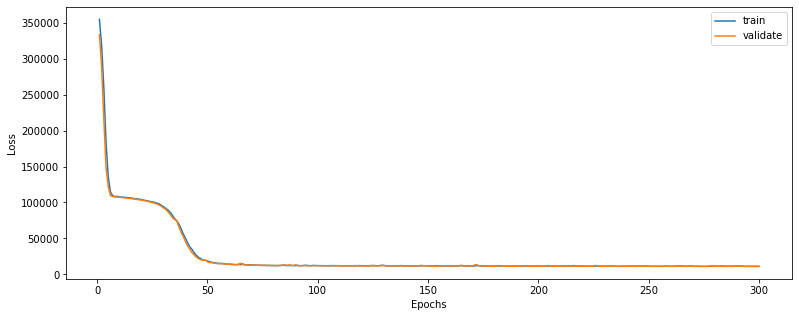

In [34]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [35]:
y_hat_train = model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:104.88852426186646, R2:0.8205886868300765
test set RMSE:105.17013551152212, R2:0.8196967914207679


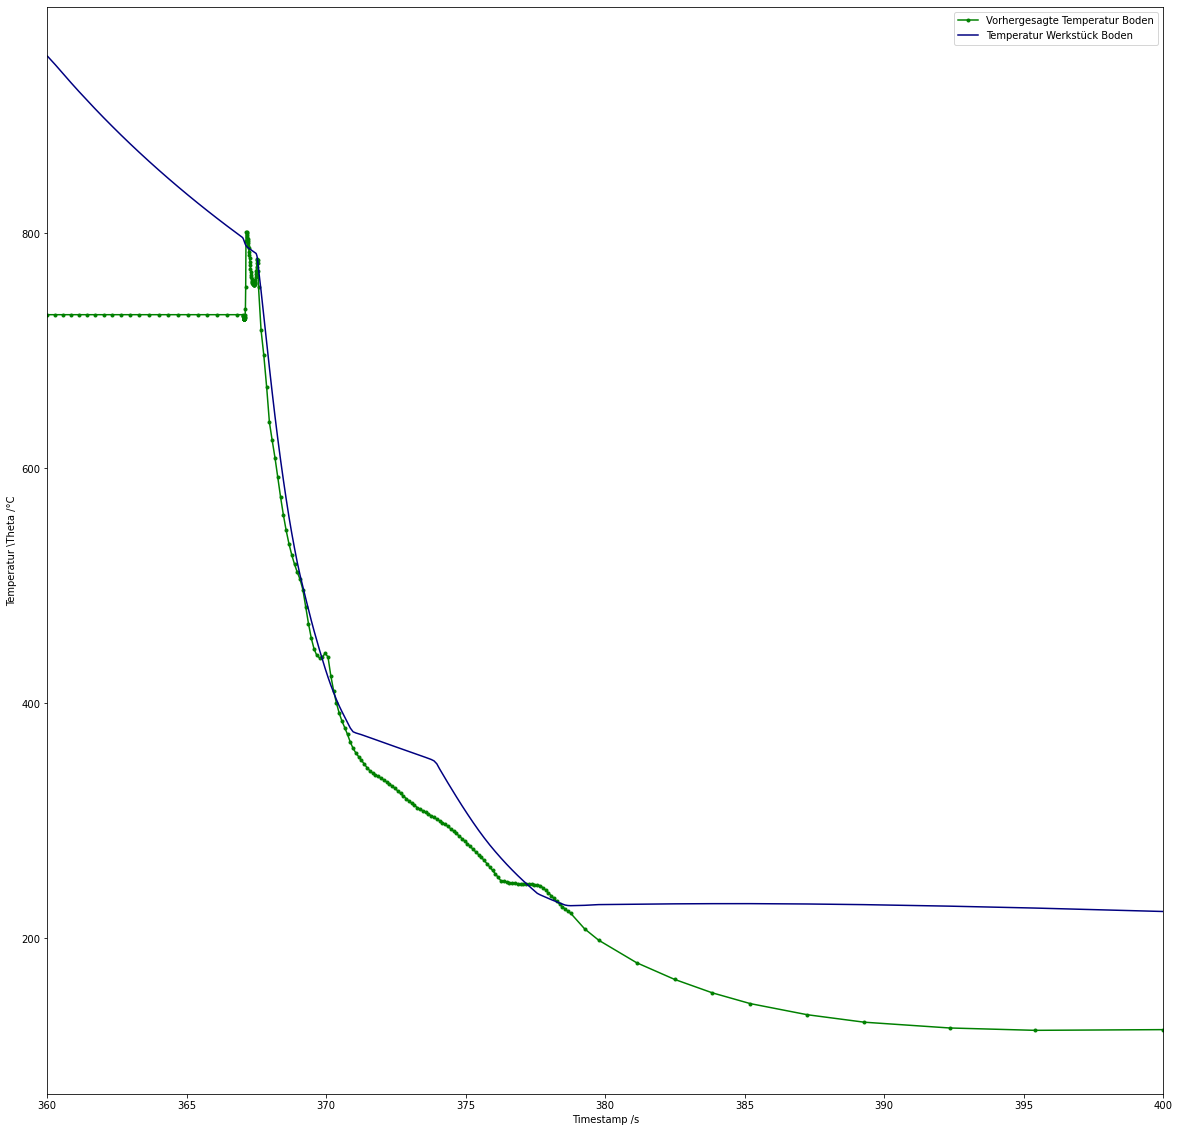

In [36]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()

plt.savefig('plots/mlp.png')

### Lagged Variables?

In [37]:
def add_specific_lags(df_input, list_of_lags):
    columns=df_input.keys()
    print(columns)
    df = df_input.copy()
    for i in list_of_lags:
        lagged_columns = [str(col) + '_lag_{}'.format(i) for col in columns]
        df[lagged_columns] = df[columns].shift(i)
    df.dropna(inplace=True)
    return df

In [38]:
specific_lags = [1,2,3,4,5,10,20]

In [39]:
X_train_lagged = add_specific_lags(X_train, specific_lags)
X_test_lagged = add_specific_lags(X_test, specific_lags)


Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_oben_zarge',
       'Matrize_mitte_zarge', 'Matrize_unten_zarge',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
       'Matrize_unten_zarge_derivative_1'],
      dtype='object')
Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_oben_zarge',
       'Matrize_mitte_zarge', 'Matrize_unten_zarge',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
       'Matrize_unten_zarge_derivative_1'],
      dtype='object')


In [40]:
idx = X_train_lagged.index
y_train_lagged = y_train.iloc[idx]


In [41]:
input_dim = len(X_train_lagged.keys())
print(len(X_train_lagged.columns))
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(output_dim))
model.summary()

80
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 405       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train_lagged, y_train_lagged,
                    validation_data=(X_test_lagged, y_test[20:]),
                    epochs=epochs)

Epoch 1/300
18/18 [==============================] - 0s 6ms/step - loss: 361023.6250 - val_loss: 370745.1875
Epoch 2/300
18/18 [==============================] - 0s 2ms/step - loss: 350706.4375 - val_loss: 356053.5938
Epoch 3/300
18/18 [==============================] - 0s 2ms/step - loss: 333071.1562 - val_loss: 332530.2500
Epoch 4/300
18/18 [==============================] - 0s 2ms/step - loss: 305115.6875 - val_loss: 297251.5312
Epoch 5/300
18/18 [==============================] - 0s 2ms/step - loss: 265893.3125 - val_loss: 251231.6719
Epoch 6/300
18/18 [==============================] - 0s 2ms/step - loss: 219075.3438 - val_loss: 200662.4844
Epoch 7/300
18/18 [==============================] - 0s 2ms/step - loss: 172899.3750 - val_loss: 158760.7188
Epoch 8/300
18/18 [==============================] - 0s 2ms/step - loss: 141322.5625 - val_loss: 134282.1094
Epoch 9/300
18/18 [==============================] - 0s 2ms/step - loss: 127218.0078 - val_loss: 125974.7578
Epoch 10/300
18/18 

Epoch 76/300
18/18 [==============================] - 0s 2ms/step - loss: 85414.6484 - val_loss: 91358.1016
Epoch 77/300
18/18 [==============================] - 0s 2ms/step - loss: 84344.0391 - val_loss: 90210.0859
Epoch 78/300
18/18 [==============================] - 0s 2ms/step - loss: 83535.6953 - val_loss: 89160.2578
Epoch 79/300
18/18 [==============================] - 0s 2ms/step - loss: 81870.1719 - val_loss: 87813.3438
Epoch 80/300
18/18 [==============================] - 0s 2ms/step - loss: 80792.4844 - val_loss: 86877.5703
Epoch 81/300
18/18 [==============================] - 0s 2ms/step - loss: 79532.7656 - val_loss: 85798.1562
Epoch 82/300
18/18 [==============================] - 0s 2ms/step - loss: 78313.3828 - val_loss: 84288.5859
Epoch 83/300
18/18 [==============================] - 0s 2ms/step - loss: 76800.0938 - val_loss: 82765.3359
Epoch 84/300
18/18 [==============================] - 0s 2ms/step - loss: 75414.2734 - val_loss: 81409.0078
Epoch 85/300
18/18 [========

18/18 [==============================] - 0s 2ms/step - loss: 5120.0942 - val_loss: 11578.1104
Epoch 152/300
18/18 [==============================] - 0s 2ms/step - loss: 4969.5962 - val_loss: 11208.0234
Epoch 153/300
18/18 [==============================] - 0s 2ms/step - loss: 4948.0991 - val_loss: 10670.0352
Epoch 154/300
18/18 [==============================] - 0s 2ms/step - loss: 4879.5151 - val_loss: 10530.3994
Epoch 155/300
18/18 [==============================] - 0s 2ms/step - loss: 4841.2173 - val_loss: 10435.1523
Epoch 156/300
18/18 [==============================] - 0s 2ms/step - loss: 4908.7139 - val_loss: 10612.9043
Epoch 157/300
18/18 [==============================] - 0s 2ms/step - loss: 4741.0854 - val_loss: 10475.8906
Epoch 158/300
18/18 [==============================] - 0s 2ms/step - loss: 4854.3906 - val_loss: 10444.8545
Epoch 159/300
18/18 [==============================] - 0s 2ms/step - loss: 4903.0664 - val_loss: 11480.5312
Epoch 160/300
18/18 [=====================

18/18 [==============================] - 0s 2ms/step - loss: 4023.0493 - val_loss: 9397.8555
Epoch 228/300
18/18 [==============================] - 0s 2ms/step - loss: 3967.4138 - val_loss: 10134.4922
Epoch 229/300
18/18 [==============================] - 0s 2ms/step - loss: 3940.7451 - val_loss: 9446.2344
Epoch 230/300
18/18 [==============================] - 0s 2ms/step - loss: 3955.2451 - val_loss: 9537.4736
Epoch 231/300
18/18 [==============================] - 0s 2ms/step - loss: 3921.6201 - val_loss: 9166.2646
Epoch 232/300
18/18 [==============================] - 0s 2ms/step - loss: 3996.3501 - val_loss: 9397.5859
Epoch 233/300
18/18 [==============================] - 0s 2ms/step - loss: 3884.6521 - val_loss: 9158.8018
Epoch 234/300
18/18 [==============================] - 0s 2ms/step - loss: 4081.8171 - val_loss: 9055.4326
Epoch 235/300
18/18 [==============================] - 0s 2ms/step - loss: 4039.6306 - val_loss: 9974.7969
Epoch 236/300
18/18 [=============================

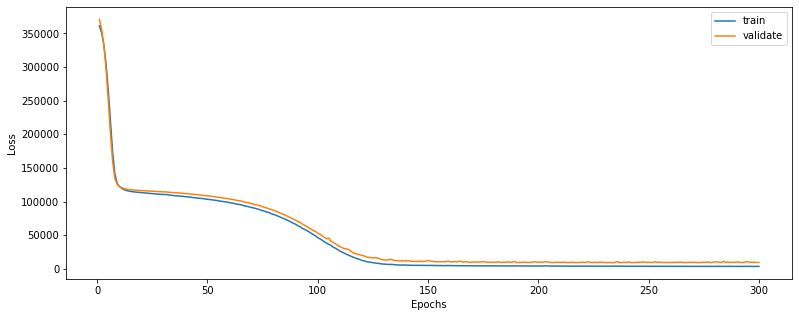

In [43]:
plot_loss(history)

In [44]:
y_hat_train = model.predict(X_train_lagged)
evaluate(y_train[20:], y_hat_train, 'train')

y_hat_test = model.predict(X_test_lagged)
evaluate(y_test[20:], y_hat_test)

train set RMSE:113.26296770800107, R2:0.7929288608456566
test set RMSE:97.11980045100081, R2:0.8507312847904194


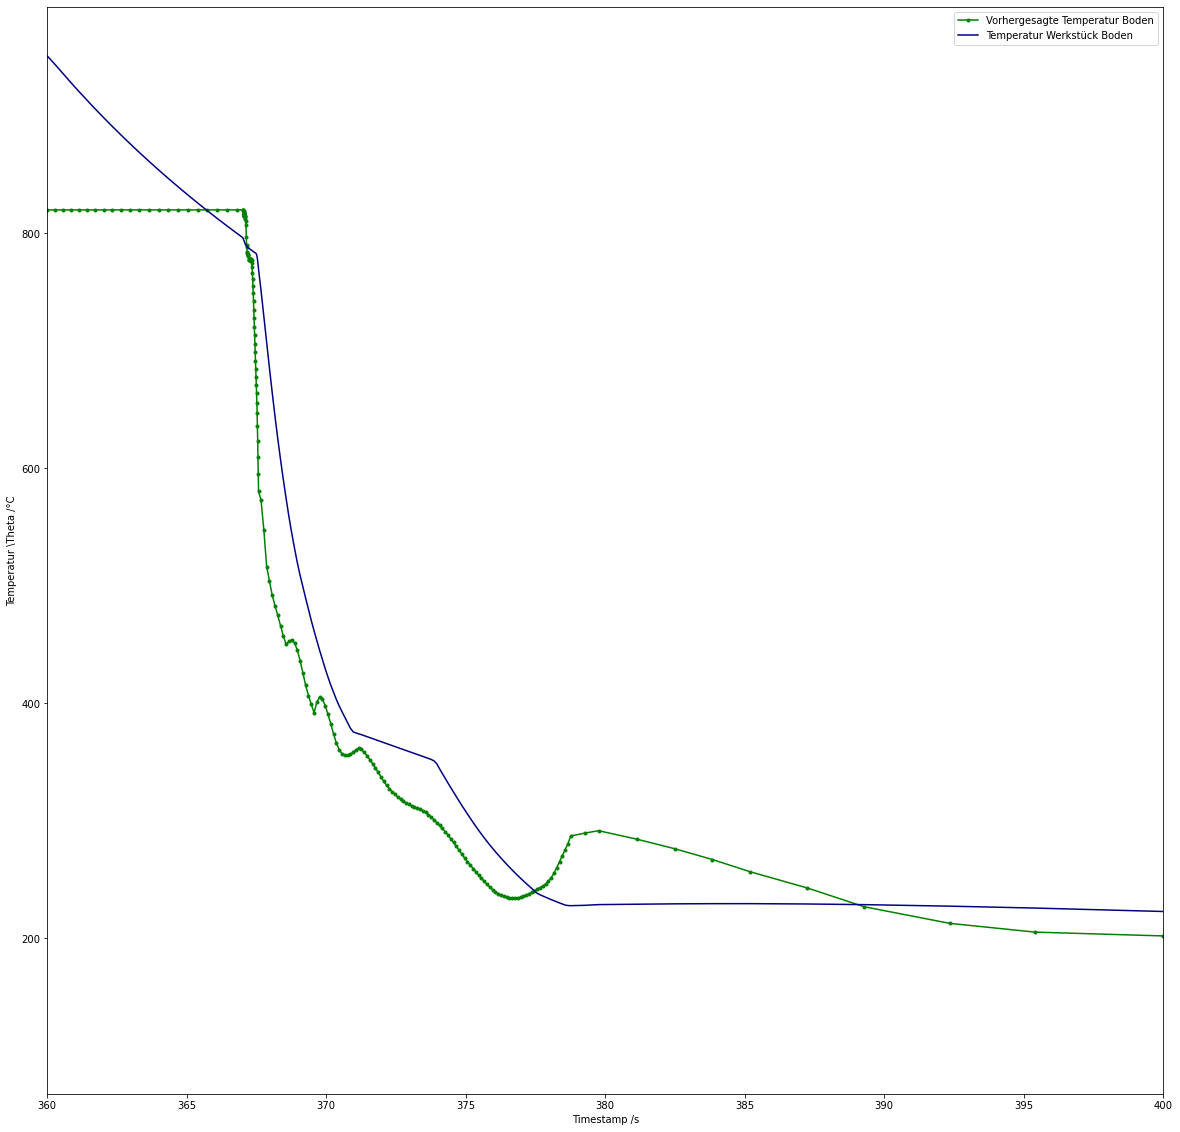

In [45]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp[20:], y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp[20:], y_test['Werkstueck_boden'][20:],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()

More Layers? Different Architecture? 

### 1DCNN

In [46]:
X_train_lagged = np.expand_dims(X_train_lagged, axis=1)
X_test_lagged = np.expand_dims(X_test_lagged, axis=1)


In [47]:

output_dim= len(y_train.keys())

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=10, strides=5, padding="causal", activation="relu",
                 input_shape=X_train_lagged.shape))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"))
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_dim))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 574, 1, 64)        51264     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 574, 1, 32)        10272     
_________________________________________________________________
dense_8 (Dense)              (None, 574, 1, 64)        2112      
_________________________________________________________________
dense_9 (Dense)              (None, 574, 1, 32)        2080      
_________________________________________________________________
dense_10 (Dense)             (None, 574, 1, 16)        528       
_________________________________________________________________
dense_11 (Dense)             (None, 574, 1, 5)         85        
Total params: 66,341
Trainable params: 66,341
Non-trainable params: 0
__________________________________________________

In [48]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train_lagged, y_train_lagged,
                    validation_data=(X_test_lagged, y_test[20:]),
                    epochs=epochs)

Epoch 1/300
18/18 [==============================] - 1s 13ms/step - loss: 358110.9688 - val_loss: 363432.6875
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 325796.0000 - val_loss: 317820.0000
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 288818.2500 - val_loss: 295802.7812
Epoch 4/300
18/18 [==============================] - 0s 3ms/step - loss: 266373.5000 - val_loss: 278392.9062
Epoch 5/300
18/18 [==============================] - 0s 3ms/step - loss: 247061.0938 - val_loss: 262599.1875
Epoch 6/300
18/18 [==============================] - 0s 3ms/step - loss: 228761.1250 - val_loss: 244018.9062
Epoch 7/300
18/18 [==============================] - 0s 3ms/step - loss: 210094.6094 - val_loss: 225618.2500
Epoch 8/300
18/18 [==============================] - 0s 3ms/step - loss: 190175.2969 - val_loss: 207436.3281
Epoch 9/300
18/18 [==============================] - 0s 3ms/step - loss: 167390.6719 - val_loss: 186852.1562
Epoch 10/300
18/18

18/18 [==============================] - 0s 4ms/step - loss: 63541.6992 - val_loss: 76247.3828
Epoch 68/300
18/18 [==============================] - 0s 4ms/step - loss: 63756.3281 - val_loss: 74775.0391
Epoch 69/300
18/18 [==============================] - 0s 3ms/step - loss: 65004.1602 - val_loss: 75472.1562
Epoch 70/300
18/18 [==============================] - 0s 3ms/step - loss: 66217.6562 - val_loss: 82663.7031
Epoch 71/300
18/18 [==============================] - 0s 3ms/step - loss: 64360.1328 - val_loss: 76515.1875
Epoch 72/300
18/18 [==============================] - 0s 3ms/step - loss: 63290.7578 - val_loss: 73140.2188
Epoch 73/300
18/18 [==============================] - 0s 3ms/step - loss: 63888.7930 - val_loss: 73283.7812
Epoch 74/300
18/18 [==============================] - 0s 2ms/step - loss: 62973.0664 - val_loss: 72970.3438
Epoch 75/300
18/18 [==============================] - 0s 3ms/step - loss: 63077.0742 - val_loss: 72749.5547
Epoch 76/300
18/18 [=====================

18/18 [==============================] - 0s 3ms/step - loss: 65229.8750 - val_loss: 67542.0625
Epoch 143/300
18/18 [==============================] - 0s 3ms/step - loss: 62547.1641 - val_loss: 63597.7070
Epoch 144/300
18/18 [==============================] - 0s 3ms/step - loss: 62214.6055 - val_loss: 63825.3828
Epoch 145/300
18/18 [==============================] - 0s 3ms/step - loss: 61961.6016 - val_loss: 63408.9531
Epoch 146/300
18/18 [==============================] - 0s 3ms/step - loss: 62781.8867 - val_loss: 67893.6875
Epoch 147/300
18/18 [==============================] - 0s 3ms/step - loss: 61767.7891 - val_loss: 65501.1211
Epoch 148/300
18/18 [==============================] - 0s 3ms/step - loss: 62201.0391 - val_loss: 62756.0820
Epoch 149/300
18/18 [==============================] - 0s 3ms/step - loss: 62071.3594 - val_loss: 64039.4414
Epoch 150/300
18/18 [==============================] - 0s 3ms/step - loss: 62187.9531 - val_loss: 65343.9844
Epoch 151/300
18/18 [============

18/18 [==============================] - 0s 3ms/step - loss: 63413.4023 - val_loss: 66211.5312
Epoch 218/300
18/18 [==============================] - 0s 3ms/step - loss: 63823.7852 - val_loss: 64533.0625
Epoch 219/300
18/18 [==============================] - 0s 3ms/step - loss: 62202.9688 - val_loss: 62096.0938
Epoch 220/300
18/18 [==============================] - 0s 3ms/step - loss: 61798.9258 - val_loss: 67938.5469
Epoch 221/300
18/18 [==============================] - 0s 3ms/step - loss: 63513.9570 - val_loss: 62966.9727
Epoch 222/300
18/18 [==============================] - 0s 3ms/step - loss: 62043.3867 - val_loss: 62794.5117
Epoch 223/300
18/18 [==============================] - 0s 3ms/step - loss: 63080.7734 - val_loss: 63246.0078
Epoch 224/300
18/18 [==============================] - 0s 3ms/step - loss: 62768.8086 - val_loss: 63155.3633
Epoch 225/300
18/18 [==============================] - 0s 3ms/step - loss: 63345.5469 - val_loss: 63688.5781
Epoch 226/300
18/18 [============

18/18 [==============================] - 0s 3ms/step - loss: 61895.6797 - val_loss: 62379.3203
Epoch 293/300
18/18 [==============================] - 0s 3ms/step - loss: 62419.5547 - val_loss: 62763.3984
Epoch 294/300
18/18 [==============================] - 0s 3ms/step - loss: 62540.1602 - val_loss: 62561.4492
Epoch 295/300
18/18 [==============================] - 0s 3ms/step - loss: 61986.3477 - val_loss: 64383.7148
Epoch 296/300
18/18 [==============================] - 0s 3ms/step - loss: 62557.3242 - val_loss: 63921.1953
Epoch 297/300
18/18 [==============================] - 0s 3ms/step - loss: 63569.9453 - val_loss: 63532.7383
Epoch 298/300
18/18 [==============================] - 0s 3ms/step - loss: 61644.3750 - val_loss: 66078.9766
Epoch 299/300
18/18 [==============================] - 0s 3ms/step - loss: 63743.3398 - val_loss: 63225.5586
Epoch 300/300
18/18 [==============================] - 0s 2ms/step - loss: 61980.7266 - val_loss: 63098.7617


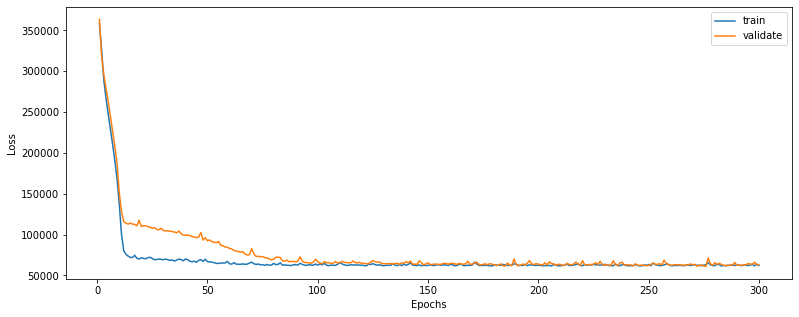

In [49]:
plot_loss(history)

In [50]:
y_hat_train = model.predict(X_train_lagged)
print(y_hat_train.shape)
evaluate(y_train[20:], y_hat_train.squeeze(), 'train')

y_hat_test = model.predict(X_test_lagged)
evaluate(y_test[20:], y_hat_test.squeeze())

(574, 1, 5)
train set RMSE:248.843231329875, R2:0.02259854282442588
test set RMSE:250.8265481713404, R2:0.03170379427753045


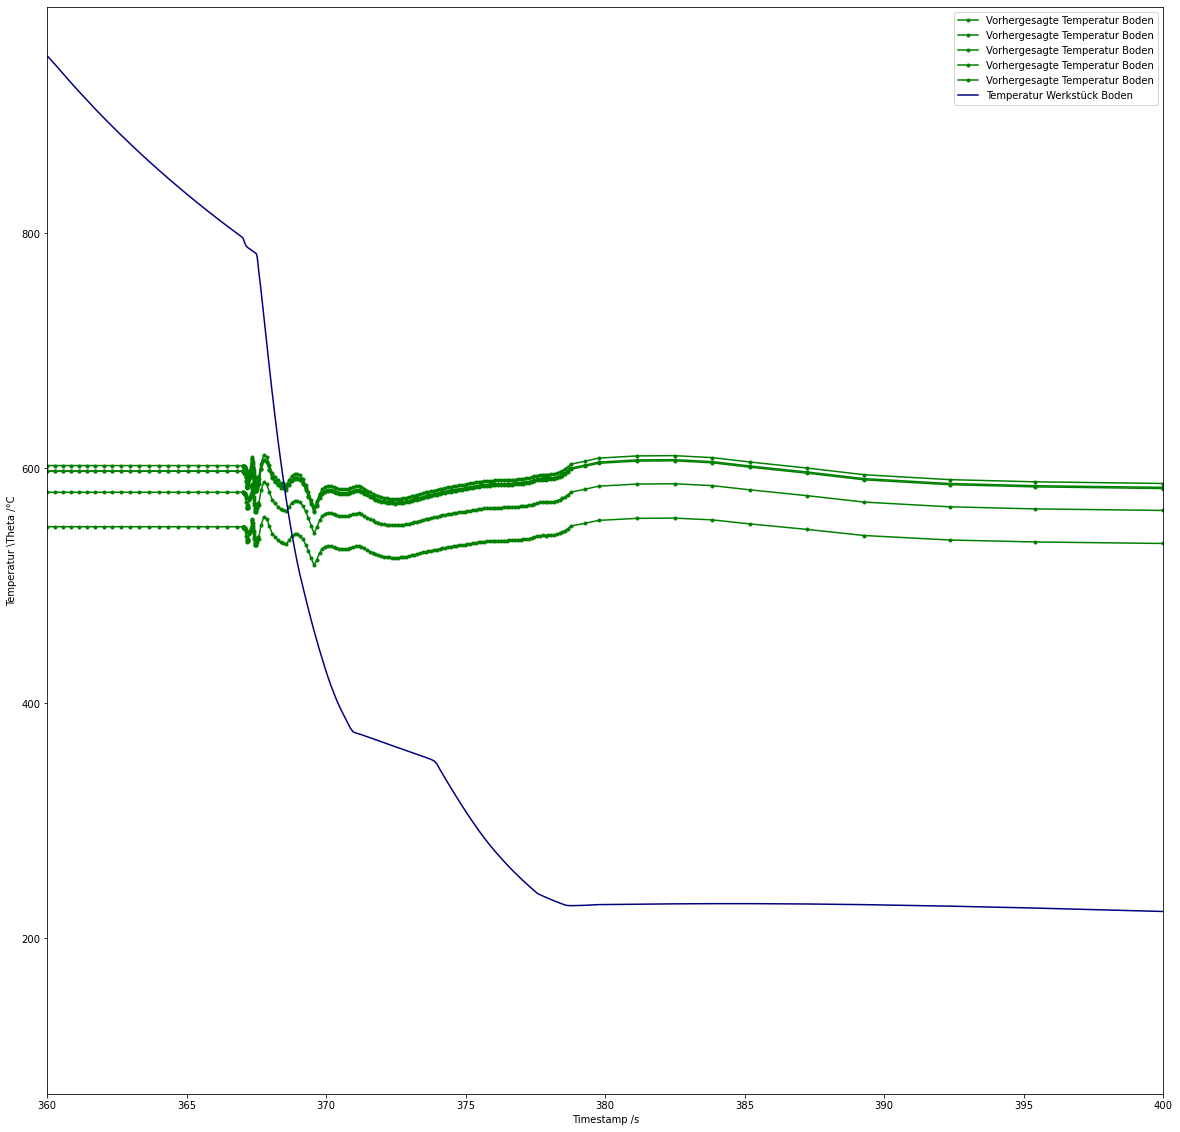

In [51]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp[20:], y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp[20:], y_test['Werkstueck_boden'][20:],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()

# LSTM?